# This code takes .csv files of the manually-combined phrase duration data, then graphs them, and color codes based on animal id.

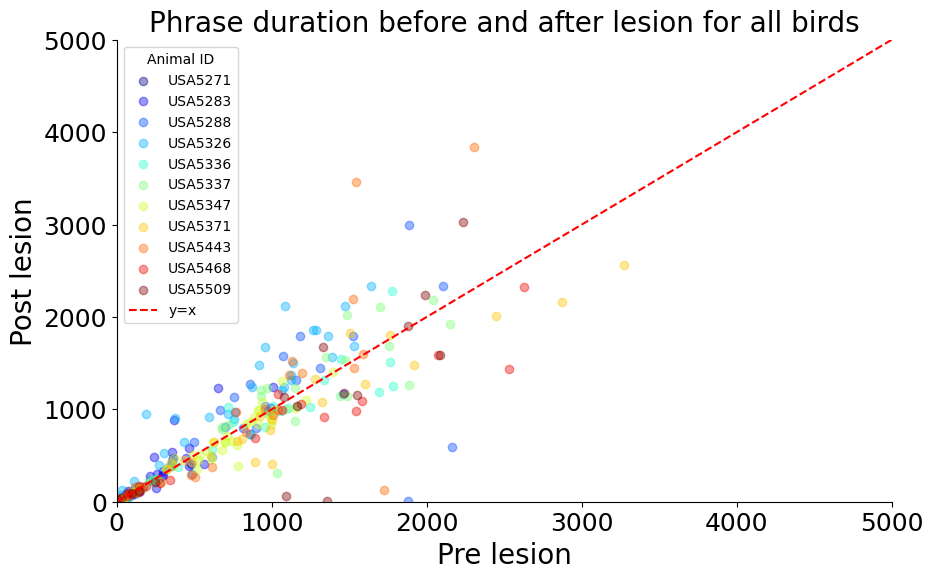

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
data = pd.read_excel('/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/combined_all_birds.xlsx')

plt.figure(figsize=(10, 6))
unique_ids = data['Animal_ID'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_ids)))

for animal_id, color in zip(unique_ids, colors):
    # Filter data for the current animal ID
    subset = data[data['Animal_ID'] == animal_id]
    # Set alpha to 0.5 for 50% transparency (adjust as needed)
    plt.scatter(subset['Mean_Pre_Treatment'], subset['Mean_Post_Treatment'], 
                label=animal_id, color=color, alpha=0.4)

# Set the x and y limits
plt.xlim(0, 5000)
plt.ylim(0, 5000)

# Retrieve the current axis limits for the red dashed line
x_limits = plt.xlim()
y_limits = plt.ylim()
plt.plot(x_limits, y_limits, 'r--', label='y=x')

plt.xlabel('Pre lesion', fontsize=20)
plt.ylabel('Post lesion', fontsize=20)
plt.title('Phrase duration before and after lesion for all birds', fontsize=20)
plt.legend(title='Animal ID')
plt.grid(False)

# Remove the top and right border
ax = plt.gca()  # get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

plt.show()


## Get it to color code based off of lesion size

In [6]:
import os
import json
import pandas as pd

def determine_hemisphere(block_number):
    if block_number.endswith('.01') or block_number.endswith('.03'):
        return 'Left'
    elif block_number.endswith('.02') or block_number.endswith('.04'):
        return 'Right'
    else:
        return 'Unknown'

def read_json_files(folder_path):
    results = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            animal_id = parts[0]  # Extracting the animal ID
            block_number = parts[1]  # Extracting the block number
            hemisphere = determine_hemisphere(block_number)  # Determining hemisphere
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                percent_lesioned = data.get("Percent of Area X Lesioned (%)", None)
                if percent_lesioned is not None:
                    results.append({
                        'Animal ID': animal_id,
                        'Block Number': block_number,
                        'Hemisphere': hemisphere,
                        'Filename': filename,
                        'Percent of Area X Lesioned': percent_lesioned
                    })
    
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(results)
    # Sorting by Animal ID and Block Number
    sorted_df = df.sort_values(by=['Animal ID', 'Block Number'])
    return sorted_df

# Specify the path to your folder
folder_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/AreaX_compare_pre_and_post_phrase_durations/calculated_lesion_volumes'
lesion_data_df = read_json_files(folder_path)
print(lesion_data_df)


   Animal ID Block Number Hemisphere                              Filename  \
13   USA5288    042624.01       Left  USA5288_042624.01_final_volumes.json   
11   USA5288    042624.02      Right  USA5288_042624.02_final_volumes.json   
14   USA5325    030624.01       Left  USA5325_030624.01_final_volumes.json   
7    USA5325    030624.02      Right  USA5325_030624.02_final_volumes.json   
10   USA5326    031524.01       Left  USA5326_031524.01_final_volumes.json   
12   USA5326    031524.02      Right  USA5326_031524.02_final_volumes.json   
8    USA5336    020824.01       Left  USA5336_020824.01_final_volumes.json   
3    USA5336    021524.01       Left  USA5336_021524.01_final_volumes.json   
0    USA5337    042624.03       Left  USA5337_042624.03_final_volumes.json   
9    USA5337    042624.04      Right  USA5337_042624.04_final_volumes.json   
5    USA5347    022124.01       Left  USA5347_022124.01_final_volumes.json   
4    USA5347    022124.02      Right  USA5347_022124.02_final_vo

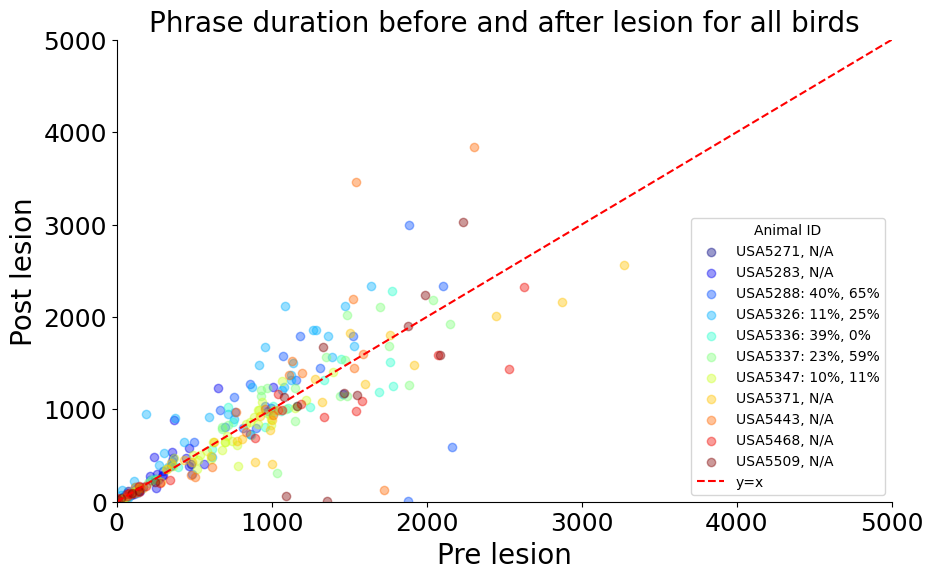

In [10]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def determine_hemisphere(block_number):
    if block_number.endswith('.01') or block_number.endswith('.03'):
        return 'Left'
    elif block_number.endswith('.02') or block_number.endswith('.04'):
        return 'Right'
    else:
        return 'Unknown'

def read_json_files(folder_path):
    results = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            animal_id = parts[0]  # Extracting the animal ID
            block_number = parts[1]  # Extracting the block number
            hemisphere = determine_hemisphere(block_number)  # Determining hemisphere
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                percent_lesioned = data.get("Percent of Area X Lesioned (%)", None)
                if percent_lesioned is not None:
                    results.append({
                        'Animal ID': animal_id,
                        'Hemisphere': hemisphere,
                        'Percent Lesioned': percent_lesioned
                    })
    # Convert list of dictionaries to DataFrame
    return pd.DataFrame(results)

# Specify the path to your folder
folder_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/AreaX_compare_pre_and_post_phrase_durations/calculated_lesion_volumes'
lesion_data_df = read_json_files(folder_path)

# Group by Animal ID and Hemisphere, and calculate mean percent lesioned, rounding to nearest integer
lesion_summary = lesion_data_df.groupby(['Animal ID', 'Hemisphere'])['Percent Lesioned'].mean().round().astype(int).unstack(fill_value=0)

# Load the Excel file
data = pd.read_excel('/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/AreaX_compare_pre_and_post_phrase_durations/combined_all_birds.xlsx')

plt.figure(figsize=(10, 6))
unique_ids = data['Animal_ID'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_ids)))

for animal_id, color in zip(unique_ids, colors):
    # Filter data for the current animal ID
    subset = data[data['Animal_ID'] == animal_id]
    # Prepare the legend text with lesion information
    if animal_id in lesion_summary.index:
        lesion_info = lesion_summary.loc[animal_id]
        left_percent = lesion_info.get("Left", "N/A")
        right_percent = lesion_info.get("Right", "N/A")
        left_label = f"{left_percent}%" if left_percent != "N/A" else "N/A"
        right_label = f"{right_percent}%" if right_percent != "N/A" else "N/A"
        label_text = f'{animal_id}: {left_label}, {right_label}'
    else:
        label_text = f'{animal_id}, N/A'
    plt.scatter(subset['Mean_Pre_Treatment'], subset['Mean_Post_Treatment'], 
                label=label_text, color=color, alpha=0.4)

# Set the x and y limits
plt.xlim(0, 5000)
plt.ylim(0, 5000)

# Retrieve the current axis limits for the red dashed line
x_limits = plt.xlim()
y_limits = plt.ylim()
plt.plot(x_limits, y_limits, 'r--', label='y=x')

plt.xlabel('Pre lesion', fontsize=20)
plt.ylabel('Post lesion', fontsize=20)
plt.title('Phrase duration before and after lesion for all birds', fontsize=20)
plt.legend(title='Animal ID')
plt.grid(False)

# Remove the top and right border
ax = plt.gca()  # get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

plt.show()


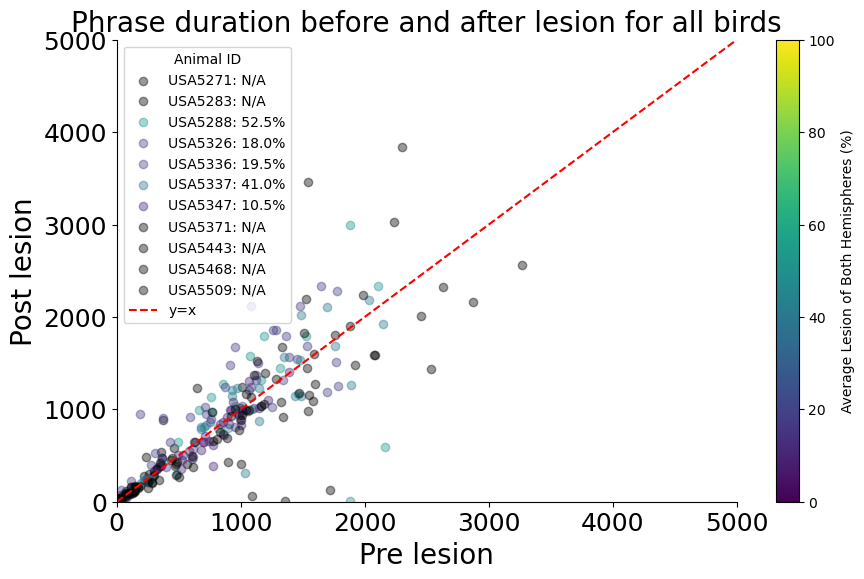

In [23]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def determine_hemisphere(block_number):
    if block_number.endswith('.01') or block_number.endswith('.03'):
        return 'Left'
    elif block_number.endswith('.02') or block_number.endswith('.04'):
        return 'Right'
    else:
        return 'Unknown'

def read_json_files(folder_path):
    results = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            animal_id = parts[0]  # Extracting the animal ID
            block_number = parts[1]  # Extracting the block number
            hemisphere = determine_hemisphere(block_number)  # Determining hemisphere
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                percent_lesioned = data.get("Percent of Area X Lesioned (%)", None)
                if percent_lesioned is not None:
                    results.append({
                        'Animal ID': animal_id,
                        'Hemisphere': hemisphere,
                        'Percent Lesioned': percent_lesioned
                    })
    # Convert list of dictionaries to DataFrame
    return pd.DataFrame(results)

# Specify the path to your folder
folder_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/AreaX_compare_pre_and_post_phrase_durations/calculated_lesion_volumes'
lesion_data_df = read_json_files(folder_path)

# Group by Animal ID and Hemisphere, and calculate mean percent lesioned, rounding to nearest integer
lesion_summary = lesion_data_df.groupby(['Animal ID', 'Hemisphere'])['Percent Lesioned'].mean().round().astype(int).unstack(fill_value=0)

# Calculate the average lesion percentage across hemispheres
lesion_summary['Average Lesion'] = lesion_summary.mean(axis=1)

# Load the Excel file
data = pd.read_excel('/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/AreaX_compare_pre_and_post_phrase_durations/combined_all_birds.xlsx')

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and a set of subplots

for animal_id in data['Animal_ID'].unique():
    # Filter data for the current animal ID
    subset = data[data['Animal_ID'] == animal_id]
    # Prepare the legend text with lesion information
    if animal_id in lesion_summary.index and lesion_summary.loc[animal_id, 'Average Lesion'] > 0:
        average_lesion = lesion_summary.loc[animal_id, 'Average Lesion']
        label_text = f'{animal_id}: {average_lesion}%'
        color = plt.cm.viridis(average_lesion / 100)  # Normalizing for color mapping
    else:
        label_text = f'{animal_id}: N/A'
        color = 'black'  # Set color to black when there is no lesion data

    ax.scatter(subset['Mean_Pre_Treatment'], subset['Mean_Post_Treatment'], 
                label=label_text, color=color, alpha=0.4)

ax.set_xlim(0, 5000)
ax.set_ylim(0, 5000)
ax.plot(ax.get_xlim(), ax.get_ylim(), 'r--', label='y=x')

ax.set_xlabel('Pre lesion', fontsize=20)
ax.set_ylabel('Post lesion', fontsize=20)
ax.set_title('Phrase duration before and after lesion for all birds', fontsize=20)
ax.legend(title='Animal ID', loc='upper left')

# Adding a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=100))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Average Lesion of Both Hemispheres (%)')

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.show()


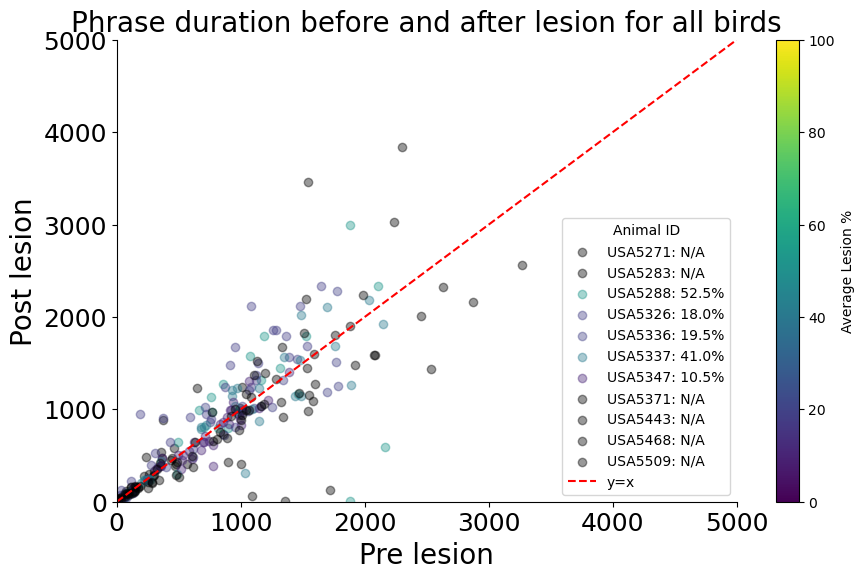

In [24]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def determine_hemisphere(block_number):
    if block_number.endswith('.01') or block_number.endswith('.03'):
        return 'Left'
    elif block_number.endswith('.02') or block_number.endswith('.04'):
        return 'Right'
    else:
        return 'Unknown'

def read_json_files(folder_path):
    results = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            animal_id = parts[0]  # Extracting the animal ID
            block_number = parts[1]  # Extracting the block number
            hemisphere = determine_hemisphere(block_number)  # Determining hemisphere
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                percent_lesioned = data.get("Percent of Area X Lesioned (%)", None)
                if percent_lesioned is not None:
                    results.append({
                        'Animal ID': animal_id,
                        'Hemisphere': hemisphere,
                        'Percent Lesioned': percent_lesioned
                    })
    # Convert list of dictionaries to DataFrame
    return pd.DataFrame(results)

# Specify the path to your folder
folder_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/AreaX_compare_pre_and_post_phrase_durations/calculated_lesion_volumes'
lesion_data_df = read_json_files(folder_path)

# Group by Animal ID and Hemisphere, and calculate mean percent lesioned, rounding to nearest integer
lesion_summary = lesion_data_df.groupby(['Animal ID', 'Hemisphere'])['Percent Lesioned'].mean().round().astype(int).unstack(fill_value=0)

# Calculate the average lesion percentage across hemispheres
lesion_summary['Average Lesion'] = lesion_summary.mean(axis=1)

# Load the Excel file
data = pd.read_excel('/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/AreaX_compare_pre_and_post_phrase_durations/combined_all_birds.xlsx')

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and a set of subplots

for animal_id in data['Animal_ID'].unique():
    # Filter data for the current animal ID
    subset = data[data['Animal_ID'] == animal_id]
    # Prepare the legend text with lesion information
    if animal_id in lesion_summary.index and lesion_summary.loc[animal_id, 'Average Lesion'] > 0:
        average_lesion = lesion_summary.loc[animal_id, 'Average Lesion']
        label_text = f'{animal_id}: {average_lesion}%'
        color = plt.cm.viridis(average_lesion / 100)  # Normalizing for color mapping
    else:
        label_text = f'{animal_id}: N/A'
        color = 'black'  # Set color to black when there is no lesion data

    ax.scatter(subset['Mean_Pre_Treatment'], subset['Mean_Post_Treatment'], 
                label=label_text, color=color, alpha=0.4)

ax.set_xlim(0, 5000)
ax.set_ylim(0, 5000)
ax.plot(ax.get_xlim(), ax.get_ylim(), 'r--', label='y=x')

ax.set_xlabel('Pre lesion', fontsize=20)
ax.set_ylabel('Post lesion', fontsize=20)
ax.set_title('Phrase duration before and after lesion for all birds', fontsize=20)
ax.legend(title='Animal ID', loc='lower right')  # Set legend position to lower right

# Adding a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=100))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Average Lesion %')

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.show()
